# Crave Fitting Room Occupancy Analysis

Some stores are struggling to deliver excellent customer service due to the popularity of the fitting rooms. Sometimes, the fitting rooms can be occupied for full hour. This has two main negative effects:

1. Customers have to wait for a long time to use the fitting room which results in a negative mood and/or they leave the store without making the purchase.  
2. Customers in the fitting room are unable to have their requests for alternative products met which also leads to negative moods. 

In this analysis, I will be analysing the fitting room occupancy. For all stores with smart fitting room technology, I will be looking at the average occupancy (% of an hour) and I will perform this analysis twice. Once on a period of 1 week, and on a period of 4 weeks. 

Data was taken from Snowflake.

**19 stores have Smart Fitting Room technology therefore the sample size of this analysis is 19**

First, importing the relevant libraries that I need. 

In [1]:
#For working with the dataframes

import pandas as pd
import numpy as np

#For data visualisations

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Creating 2 dataframes; one for each time period. 

In [25]:
df_w1 = pd.read_csv('ALL STORES - FRO 1 Week.csv')
df_p1 = pd.read_csv('ALL STORES - FRO P1.csv')

In [15]:
df_w1.head()

,DAY_OF_THE_WEEK,TIME_PERIOD,AVERAGE_FR_OCCUPANCY_PCT
0,1. Sunday,08-09,23.888900
1,1. Sunday,09-10,40.000000
2,1. Sunday,10-11,18.518522
3,1. Sunday,11-12,35.199276
4,1. Sunday,12-13,43.345960


The issue is that sometimes, before the stores open, staff move stock into the fitting room area. The RFID technology in the fitting room detects the stock and think someone has started a session. For this reason, I have excluded the time window of 8:00-9:00.

Converting the dataframes into pivots so that I can then turn them into heat maps.

The first heat map (orange) is for 1 week and the second heat map (green) is for the period of 4 weeks.

In [16]:
df_w1_pv = df_w1.pivot_table(values = 'AVERAGE_FR_OCCUPANCY_PCT', index = 'DAY_OF_THE_WEEK', columns = 'TIME_PERIOD')
df_w1_pv = df_w1_pv.drop(columns = ['08-09'])

Text(95.72222222222221, 0.5, 'Day of the Week')

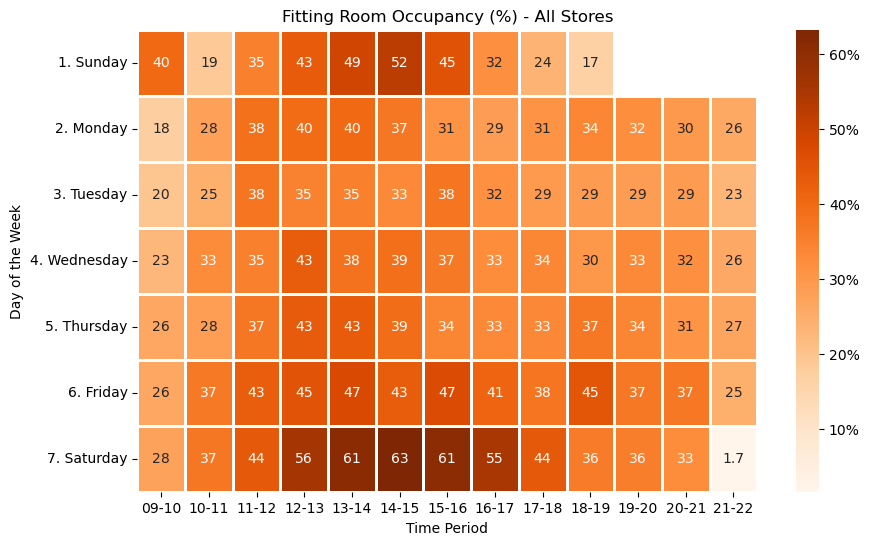

In [9]:
plt.figure(figsize = (10,6))
plt.title('Fitting Room Occupancy (%) - All Stores')
sns.heatmap(df_w1_pv,cmap='Oranges',linecolor='white',linewidths=1, annot = True,cbar_kws={'format': '%.0f%%'})
plt.xlabel('Time Period')
plt.ylabel('Day of the Week')

In [23]:
df_p1_pv = df_p1.pivot_table(values = 'AVERAGE_FR_OCCUPANCY_PCT', index = 'DAY_OF_THE_WEEK', columns = 'TIME_PERIOD')
df_p1_pv = df_p1_pv.drop(columns = ['08-09'])

Text(95.72222222222221, 0.5, 'Day of the Week')

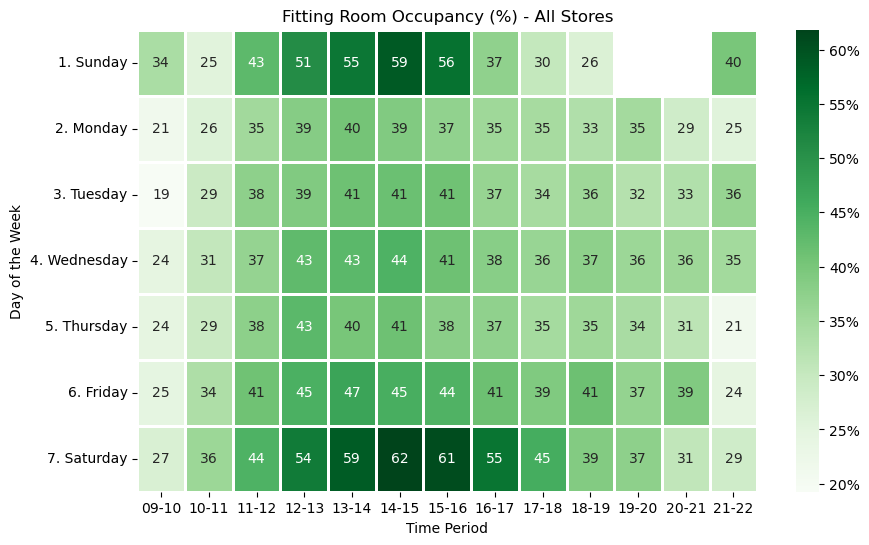

In [26]:
plt.figure(figsize = (10,6))
plt.title('Fitting Room Occupancy (%) - All Stores')
sns.heatmap(df_p1_pv,cmap='Greens',linecolor='white',linewidths=1, annot = True,cbar_kws={'format': '%.0f%%'})
plt.xlabel('Time Period')
plt.ylabel('Day of the Week')

From the two heat maps, the conclusion is that Saturday and Sunday afternoon (1pm - 4pm) are the period where the fitting rooms are the most occupied. On average, fitting room occupancy exceeds 60%. Bearing in mind that this is an average over 19 stores of various sizes and profiles, it is entirely possible that certain stores are overwhelmed with the number of customers. This supports the case that some store managers are making for more fitting rooms to be installed. 